In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf, pacf

In [2]:
HDFC_st = pd.read_csv('HDFCBANK.csv')
HDFC_st

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.0,9791881.0,0.6491
5302,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.0,5650216.0,0.5488
5303,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.0,7196647.0,0.5971
5304,2021-04-29,HDFCBANK,EQ,1476.80,1486.20,1503.65,1461.00,1471.65,1472.50,1481.15,12039276,1.783196e+15,252296.0,4818551.0,0.4002


In [3]:
HDFC_st = HDFC_st.dropna()
HDFC_st.index = pd.to_datetime(HDFC_st.Date)
HDFC_st = HDFC_st['Close']['01-01-2016':'12-31-2016']
HDFC_st

Date
2016-01-01    1088.75
2016-01-04    1070.50
2016-01-05    1062.40
2016-01-06    1067.10
2016-01-07    1056.20
               ...   
2016-12-26    1175.00
2016-12-27    1185.20
2016-12-28    1186.75
2016-12-29    1205.20
2016-12-30    1206.20
Name: Close, Length: 247, dtype: float64

In [4]:
HDFC_st_log = HDFC_st.apply(lambda x:np.log(x))

<Figure size 720x576 with 0 Axes>

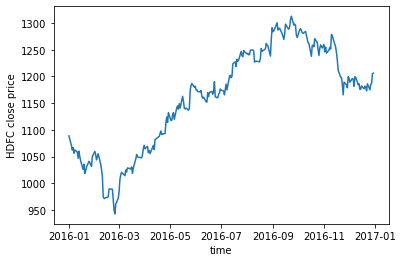

In [5]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1)
ax.set_xlabel('time')
ax.set_ylabel('HDFC close price')
plt.plot(HDFC_st)

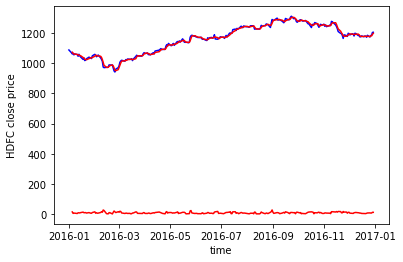

In [6]:
roll_mean = HDFC_st.rolling(3).mean()
roll_std = HDFC_st.rolling(3).std()

fig, ax = plt.subplots(1)
ax.set_xlabel('time')
ax.set_ylabel('HDFC close price')
plt.plot(HDFC_st, color = 'blue', label = 'Origin')
plt.plot(roll_mean, color = 'red', label = 'Rolling mean')
plt.plot(roll_std, color = 'red', label = 'Rolling stddev')

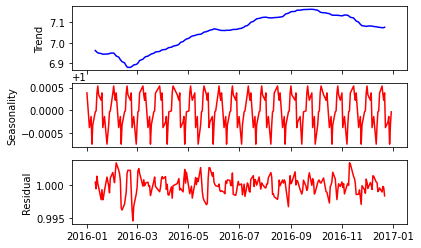

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(HDFC_st_log, period = 12, model ='multiplicative')

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(3, sharex=True)
ax[0].set_ylabel('Trend')
ax[1].set_ylabel('Seasonality')
ax[2].set_ylabel('Residual')
ax[0].plot(trend, color = 'blue', label = 'Trend')
ax[1].plot(seasonality, color = 'red', label = 'Seasonality')
ax[2].plot(residual, color = 'red', label = 'Residual')

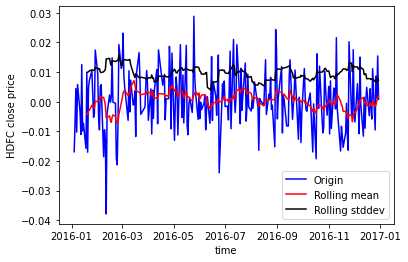

In [8]:
HDFC_st_log_diff = HDFC_st_log.diff().dropna()
log_diff_roll_mean = HDFC_st_log_diff.rolling(12).mean()
log_diff_roll_std = HDFC_st_log_diff.rolling(12).std()

fig, ax = plt.subplots(1)
ax.set_xlabel('time')
ax.set_ylabel('HDFC close price')
plt.plot(HDFC_st_log_diff, color = 'blue', label = 'Origin')
plt.plot(log_diff_roll_mean , color = 'red', label = 'Rolling mean')
plt.plot(log_diff_roll_std, color = 'black', label = 'Rolling stddev')
plt.legend(loc='best')

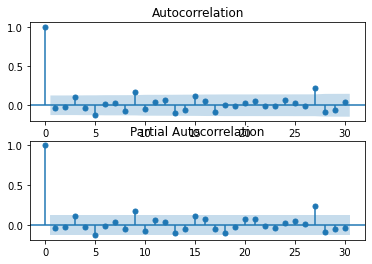

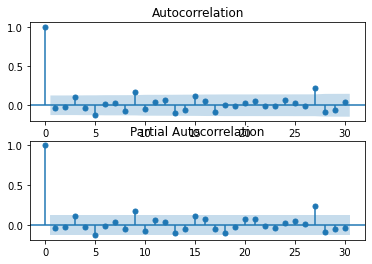

In [11]:
HDFC_st_log_acf = acf(HDFC_st_log_diff, nlags=2)
HDFC_st_log_pacf = acf(HDFC_st_log_diff, nlags=2)

fig, ax = plt.subplots(2)
sm.graphics.tsa.plot_acf(HDFC_st_log_diff, lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(HDFC_st_log_diff, lags = 30, ax = ax[1])